In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### Make sure it's all numerical (Video = Getting your data ready convert data to Numbers)
car_sales = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [3]:
len(car_sales)

1000

In [4]:
car_sales.dtypes ##

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [6]:
car_sales.dropna(inplace=True)

In [7]:
# Split the data into X and y
X = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

# Split into training and test
X_train, X_test, y_test, y_train = train_test_split(X,
                                                   y,
                                                   test_size=0.2 )

In [8]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [9]:
## Turn the categories into numbers 


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder(sparse=False)
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],  # Tuple
                               remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

C:\Users\saha7\Desktop\sample_project\env\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [10]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,163322.0
769,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
770,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
771,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [11]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [12]:
dummies = pd.get_dummies(car_sales[["Make","Doors","Colour"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4.0,0,1,0,0,0,0,0,0,1
1,5.0,1,0,0,0,0,1,0,0,0
2,4.0,0,1,0,0,0,0,0,0,1
3,4.0,0,0,0,1,0,0,0,0,1
4,3.0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
994,3.0,1,0,0,0,0,1,0,0,0
995,4.0,0,0,0,1,1,0,0,0,0
997,4.0,0,0,1,0,0,1,0,0,0
998,4.0,0,1,0,0,0,0,0,0,1


In [13]:
# Let's refit the model
np.random.seed(42)
model = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [14]:
model.score(X_test,y_test)

0.35930666172697523

In [15]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

### 1.2 What if there were missig values?

1. Fill them with some value (also known as imputation).
2. Remove the smaples with missing data altogether.

In [16]:
# Import car sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [17]:
car_sales_missing.isna().sum() #Total value of missing data each columns

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [18]:
# Create X & y
XX = car_sales_missing.drop("Price",axis=1)
yy = car_sales_missing["Price"]

In [19]:
# Let's try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder(sparse=False)
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder = "passthrough")
transformed_XX = transformer.fit_transform(XX)
transformed_XX

C:\Users\saha7\Desktop\sample_project\env\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [20]:
pd.DataFrame(transformed_XX)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,35820.0
996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,215883.0


## Option 1: Fil missing data with Pandas

In [21]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace = True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace = True)

# Fill the "Odomete (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace = True)

In [22]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [23]:
# Remove rows with missing Price Value
car_sales_missing.dropna(inplace =True)

In [24]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [25]:
len(car_sales_missing)

950

In [26]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


## Option 2: Fill missing value with Scikit-Learn

In [27]:
car_sales_missing1 = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing1


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [28]:
car_sales_missing1.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [29]:
# Drop the rows with no labels
car_sales_missing1.dropna(subset=["Price"],inplace=True) #dropna from subset
car_sales_missing1.isna().sum()
#There is no null in the price thats why is null sum is zero

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [30]:
# Split into X and y
XXX = car_sales_missing1.drop("Price",axis=1)
yyy = car_sales_missing1["Price"]

In [31]:
XXX.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [32]:
# Fill miissing values with Scikit-Learn

from sklearn.impute import SimpleImputer #is used to fill missing values
from sklearn.compose import ColumnTransformer

# Fill catergorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value = "missing")#cat~categorical
door_imputer = SimpleImputer(strategy="constant", fill_value = 4)
num_imputer = SimpleImputer(strategy="mean")

# Define Columns
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (Something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])
# ColumnTransformer takes a list
# Transform the data
filled_XXX = imputer.fit_transform(XXX)
filled_XXX


array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [33]:
car_sales_filled = pd.DataFrame(filled_XXX,
                               columns = ["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [34]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [35]:
transformed_XXX = transformer.fit_transform(car_sales_filled)
transformed_XXX

C:\Users\saha7\Desktop\sample_project\env\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0.0, 1.0, 0.0, ..., 1.0, 0.0, 35431.0],
       [1.0, 0.0, 0.0, ..., 0.0, 1.0, 192714.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 84714.0],
       ...,
       [0.0, 0.0, 1.0, ..., 1.0, 0.0, 66604.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 215883.0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 248360.0]], dtype=object)

In [36]:
pd.DataFrame(transformed_XXX)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0


In [37]:
# Now we've got our data as numbers and filled(No missing)
# Let's fit a mdoel
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

XXX_train, XXX_test, yyy_train, yyy_test = train_test_split(transformed_XXX, yyy,test_size = 0.2 )

model = RandomForestRegressor() #its our machine learning model
model.fit(XXX_train, yyy_train)
model.score(XXX_test,yyy_test)

0.21990196728583944

## 2. Choosing the right estimator/algorithm for our problem
Scikit-Learn uses estimator as another term for machine learning model or algorithm.

* Classification - predicting whether a sample is one thing or another.(like have heart-disease or not)
* Regression - predicting a number

Step 1 - check the Scikit-Learn machhine learning map...https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression

## 2.1 Picking a machine learning model for a regression problem

In [38]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
# Importing boston data set as classical way isn't working


In [39]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [40]:
boston_df = pd.DataFrame(data,columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT  "])
boston_df["target"] = pd.Series(target)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [41]:
## How many samples?
len(boston_df) ## its a regression problem


506

In [42]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setyp random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target",axis=1)
y = boston_df["target"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantitate Ridge model
model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6662221670168522

How do we improve this score?

What if Ridge wasn't working?

Let's refer back to the map...https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression

In [43]:
# Let's try RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = boston_df.drop("target",axis=1)
y = boston_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf = RandomForestRegressor(n_estimators=100) #n_estimators is a hyper parameter
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8654448653350507

In [44]:
model.score(X_test, y_test)

0.6662221670168522

### 2.2 Choosing an estimator for classification problem
Let's go to the map...https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [45]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
len(heart_disease)

303

Consulting the map and it says to try LinearSVC

In [47]:
# heart diseases or not heart_diseases is predicting a category
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Set up random seed
np.random.seed(42)

# Get your data ready
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
clf = LinearSVC(max_iter = 100) ####
clf.fit(X_train,y_train)
clf.score(X_test, y_test)


C:\Users\saha7\Desktop\sample_project\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.47540983606557374

In [48]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [49]:
# Let's try RandomForestClassifier as LInearSVC isn't working properly
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
cf = RandomForestClassifier(n_estimators = 100) ###
cf.fit(X_train, y_train)
cf.score(X_test, y_test)

0.8360655737704918

Tidbit:
    
    1. If you have structured data, used ensembles methods
    2. If you have unstructured(images,text) data, use deep learning or       transfer learning.

    

In [50]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Differrent names for:

* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [51]:
# Let's try RandomForestClassifier as LinearSVC isn't working properly
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
cf = RandomForestClassifier(n_estimators = 100) ###


# Fit the model to the data (training the machine learning model)
cf.fit(X_train, y_train) 
## Finding patterns in the data


cf.score(X_test, y_test) #(use the patterns the model has learned  )

0.8360655737704918

In [52]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [53]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predicitons using a Machine Learning model



2 ways to make predicitons:
    1. `predict()`
    2. `predict_proba()`

In [54]:
X_test.shape

(61, 13)

In [55]:
cf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [56]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [57]:
# Compare predictions to truth labels to evaluate the model y_test = truth label,y_pred = X_test predictions based on the features we have given
y_preds = cf.predict(X_test)
np.mean(y_preds == y_test)

0.8360655737704918

In [58]:
cf.score(X_test, y_test)

0.8360655737704918

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8360655737704918

Make predicitons with `predict_proba()`

In [60]:
# predict_proba() returns probabilities of a classification label
cf.predict_proba(X_test[:5])

array([[0.95, 0.05],
       [0.38, 0.62],
       [0.45, 0.55],
       [0.86, 0.14],
       [0.21, 0.79]])

In [61]:
# Let's predict() on the same data...
cf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [62]:
# row no 179 is label 0 and 95% chance of not diagnos with heart_disease
# row no 228 is label 1 and 62% chance of diagnnos with heart_disease

In [63]:
X_test[:5] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [64]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can also be used for regression model

In [65]:
boston_df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [66]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42) #result are reproducable

# Create the data
X = boston_df.drop("target",axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestRegressor() 
model.fit(X_train,y_train)
model.score(X_test,y_test)



0.8654448653350507

In [67]:
y_preds = model.predict(X_test)
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [68]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [69]:
# Compare the predictions to the truth 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds,y_test) #23.6 - 23.081 + ...


2.136382352941176

## 4. Evaluating machine learning model

Three ways to evaluate Scikit-Learn models/estimators
1. Estimator `score` method
2. The `scoring` paramters
3. Problem-specific metric functions.

### 4.1 Evaluating a method with the `score` method

In [70]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [71]:
clf.score(X_train, y_train)

1.0

In [72]:
clf.score(X_test, y_test)

0.8524590163934426

Let's do the same but for regression

In [73]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# Model is trained on training data, and evaluated on test data

model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [74]:
model.score(X_train,y_train)

0.924203269641995

In [75]:
model.score(X_test, y_test)

0.5106393318965518

### 4.2 Evaluating a model using the `scoring` parameter

In [76]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)



RandomForestClassifier()

In [77]:
clf.score(X_test, y_test)

0.8524590163934426

In [78]:
cross_val_score(clf, X, y,cv= 10 ) #cross_validation_score cv = k

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [79]:
# K fold Cross-validation K = arbitary number
# Model is trained on k different versions of training data,and evaluated on k different version of test data





In [80]:
np.random.seed(42)

# Single training and test split score
clf_single_score  = clf.score(X_test, y_test)

# Take mean of 5-fold Cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf,X,y,cv=5)) # 5 split

# Compare the two
clf_single_score,clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [81]:
# Scoring parameter set to none by default
cross_val_score(clf,X,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaulation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

## Accuracy

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
 
clf = RandomForestClassifier()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
clf.fit(X_train,y_train)
cross_val_score = cross_val_score(clf,X,y,cv=5)


In [83]:
np.mean(cross_val_score) #mean of cv is accuracy of cv

0.811639344262295

In [84]:
print(f"Heart Disease Classifier Cross-Validated Accuracy : {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy : 81.16%


In [85]:
clf.score(X_test,y_test)

0.8524590163934426

## Area under the Receiver Operating Characterisitics curve(AUC/ROC)

* Area Under Curve
* ROC Curve

ROC curves are a comparison of a model's true postive rate(tpr) versus a model's false postive rate(fpr)
ROC = tpr vs fpr

* True positive = Model predicts 1 when truth is 1
* False positive = Model predicts 1 when truth is 0
* True negative = Model predicts 0 when truth is 0
* False negative = Model predicts 0 when truth is 1


In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [87]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities 
y_probs = clf.predict_proba(X_test)
y_probs[:5],len(y_probs)

(array([[0.94, 0.06],
        [0.06, 0.94],
        [0.34, 0.66],
        [0.11, 0.89],
        [0.06, 0.94]]),
 61)

In [88]:
y_positive_probs = y_probs[:,1] #1 index value of column
y_positive_probs[:10]
# y_positive_probs is just a slice of y_predict_proba

array([0.06, 0.94, 0.66, 0.89, 0.94, 0.98, 0.95, 0.09, 0.15, 0.98])

In [89]:
# Calculate fpr,tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_positive_probs)

# Check the false positive rates
fpr


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03846154, 0.03846154, 0.11538462,
       0.11538462, 0.23076923, 0.30769231, 0.38461538, 0.53846154,
       0.57692308, 0.73076923, 0.76923077, 0.80769231, 0.88461538,
       0.92307692, 1.        ])

In [90]:
tpr

array([0.        , 0.02857143, 0.14285714, 0.22857143, 0.28571429,
       0.37142857, 0.42857143, 0.45714286, 0.57142857, 0.65714286,
       0.71428571, 0.85714286, 0.85714286, 0.94285714, 0.94285714,
       0.97142857, 0.97142857, 0.97142857, 0.97142857, 0.97142857,
       0.97142857, 0.97142857, 0.97142857, 1.        , 1.        ,
       1.        , 1.        ])

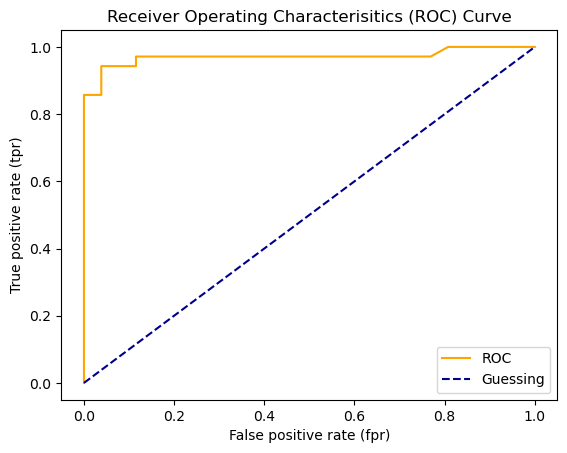

In [91]:
# Create a function for plotting ROC curves

import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the flase positive rate (fpr)
    and true positive rate(tpr) of a model.
    """
    
    # Plot the curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predicitive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characterisitics (ROC) Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr);
    
    
    

In [92]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_positive_probs)

0.9708791208791208

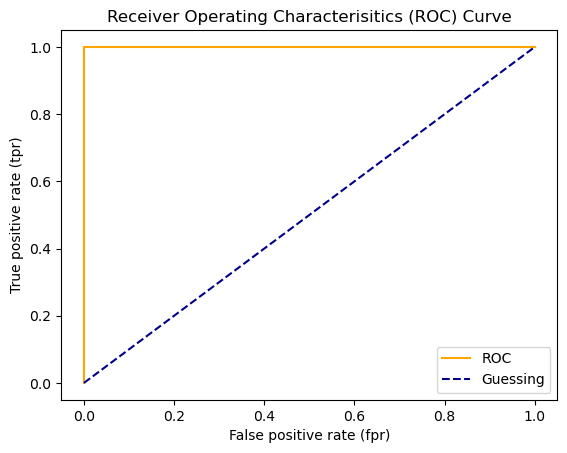

In [93]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [94]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

## Confusion matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence,giving you an idea of where the model is getting confused.

In [95]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[25,  1],
       [ 3, 32]], dtype=int64)

In [96]:
# Visualize confusion_matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])


Predicted Labels,0,1
Actual Labels,,
0,25,1
1,3,32


In [97]:
len(X_test)

61

In [98]:
25+1+3+32

61

In [99]:
# How to intsall a conda package into the current environment to from a Jupyter Notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done



==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.3.1





Solving environment: ...working... done

# All requested packages already installed.



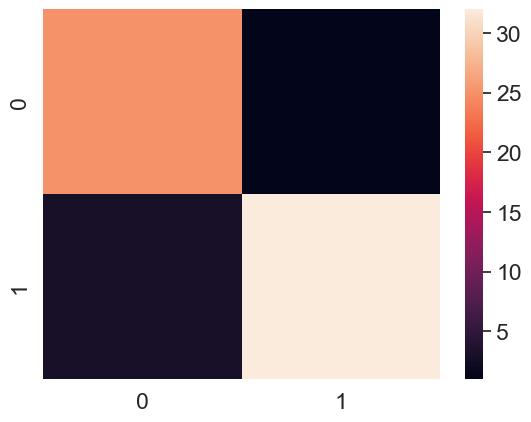

In [100]:
# Make our confusion matrix more visual with seaborn's heatmap
import seaborn as sns

# Set the font scale 
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

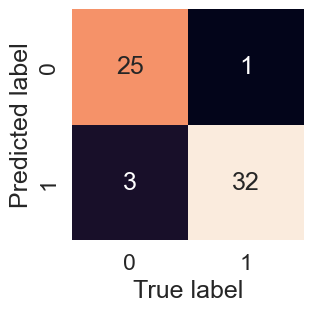

In [101]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using a Seaborn's heatmap
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True, ## Annotate the boxes with conf_mat info
                     cbar=False
                     
                    )
    plt.xlabel("True label")
    plt.ylabel("Predicted label");
plot_conf_mat(conf_mat)

##### Classification_Report

In [102]:
from sklearn.metrics import classification_report
pd.DataFrame(classification_report(y_test,y_preds,output_dict=True)) #print

,0,1,accuracy,macro avg,weighted avg
precision,0.892857,0.969697,0.934426,0.931277,0.936946
recall,0.961538,0.914286,0.934426,0.937912,0.934426
f1-score,0.925926,0.941176,0.934426,0.933551,0.934676
support,26.000000,35.000000,0.934426,61.000000,61.000000


In [103]:
zeros = np.zeros(10000)
zeros.shape

(10000,)

In [104]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 #only one positive case
disease_preds = np.zeros(10000) # model predicts every case as 0
pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True #parameter
                                  ))

C:\Users\saha7\Desktop\sample_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saha7\Desktop\sample_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saha7\Desktop\sample_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### To summarize classification metrics:

    * Accuracy is good measure to start with if all classes are balanced(e.g. same amount of samples which are labelled with 0 or 1).
    
    * Precision and recall become more important when classes are imbalanced.
    * If false positive predicitons are worse than false negatives, aim for higher precision.
    * If false negative predicitons are worse than false positives, aim for higher recall.
    * F1-score is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced r-squared) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

* R^2
What R^2 does: Compares your model predicitons to the mean of the targets.Values can range form negative infinity(a very poor model) to 1.For example,if all your model does is predict the mean of the targets,it's R^2 value would be zero.And if your model predicts a range of numbers it value would be 1.

In [105]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = boston_df.drop("target",axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)



0.8654448653350507

In [106]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())


In [107]:
len(y_test)

102

In [108]:
y_test.mean()

21.488235294117644

In [109]:
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [110]:
r2_score(y_test, y_test_mean)

0.0

In [111]:
r2_score(y_test, y_test)

1.0

###### How far off is each prediction is ??
For your regression model you want maximize your R^2 and minimize your MAE & MSE

In [112]:
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [113]:
# Our models predicitons are 2.13 units away from our actual value.


In [114]:
df = pd.DataFrame(data={"actual value": y_test,
                 "predicted value": y_preds})
df

,actual value,predicted value
173,23.6,23.081
274,32.4,30.574
491,13.6,16.759
72,22.8,23.460
452,16.1,16.893
...,...,...
412,17.9,13.159
436,9.6,12.476
411,17.2,13.612
86,22.5,20.205


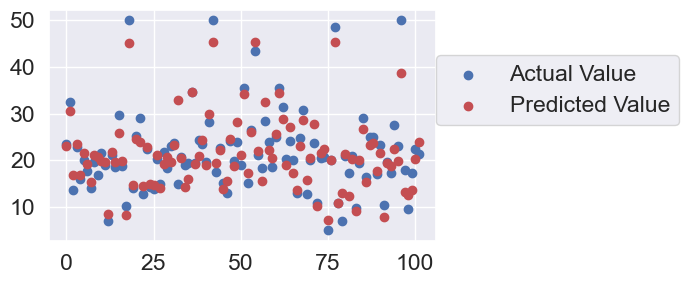

In [115]:
fig,ax = plt.subplots(figsize=(5,3))
x = np.arange(0,len(df),1)
ax.scatter(x, df["actual value"],c='b',label="Actual Value")
ax.scatter(x, df["predicted value"],c='r',label="Predicted Value")
ax.legend(loc=(1,0.5));

In [116]:
len(df)

102

In [117]:
df.head(5)

,actual value,predicted value
173,23.6,23.081
274,32.4,30.574
491,13.6,16.759
72,22.8,23.460
452,16.1,16.893


In [118]:
df["differences"] = df["predicted value"] - df["actual value"]
df


,actual value,predicted value,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


In [119]:
np.abs(df["differences"]).mean()  #mean absolute error

2.136382352941176

### Mean Squared Error (MSE)

In [120]:
from sklearn.metrics import mean_squared_error
y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [121]:
# Calculate MSE by hand
(df["differences"] ** 2).mean()

9.867437068627442

### 4.2.3 Finally using `scoring` parameter

In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)




In [123]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [124]:
# Cross-Validated accuracy
print(f"The cross-validated accuracy is : {np.mean(cv_acc)*100:.2f} %" )

The cross-validated accuracy is : 82.48 %


In [125]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
print(f"The cross-validated accuracy is : {np.mean(cv_acc)*100:.2f} %" )

The cross-validated accuracy is : 82.48 %


In [126]:
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [127]:
# Precision
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
np.mean(cv_precision)

0.8085601538512754

In [128]:
# Recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [129]:
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
np.mean(cv_f1)

0.841476533416832

##### How about regression model?

In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor 
np.random.seed(42)

X = boston_df.drop("target",axis=1)
y = boston_df["target"]
model = RandomForestRegressor()


In [131]:
np.random.seed(42)
cv_r2 = cross_val_score(model,X,y,cv=5,scoring='r2')
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [132]:
cv_mae = cross_val_score(model,X,y,cv=5,scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-3.003222869345758

In [133]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [134]:
cv_mse = cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.12863512415064

### 4.3 Using different evaluation metrics as Scikit-Learn functions

#### Classification evaluation functions


In [135]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Make your predictions
y_preds = clf.predict(X_test)

# Evalutae the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test,y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test,y_preds)}")
print(f"Recall: {recall_score(y_test,y_preds)}")
print(f"F1: {f1_score(y_test,y_preds)}");



Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


#### Regression evaluation functions

In [136]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target",axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)
y_test_mean = np.full(len(y_test), y_test.mean())

# Evaluate the regression model
print(f"Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test,y_preds)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test,y_preds)}")

 


Regression model metrics on the test set
R^2: 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442


### 5. Improving a model  

First predictions = baseline predictions.

First model = basline model.

From a data prespective:
* Could we collect more data? (genreally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?


Hyperparameters vs. Parameters
* parameters = model find these patterns in data
* Hyperparameters = setting on a model you can adjust to (potentially) improve its ability to find patterns


Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomizedSearchCV
3. Exhaustively with GridSearchCV




In [137]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()



In [138]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets,training,validation and test.

##### Validation set = practice exam
##### est set = Final exam
##### Generalization = The ability for a machine learning model to perform well on a data it hasn't seen before

We're going to try and adjust:
    
    * `max_depth`
    * `max_features`
    * `min_samples_leaf`
    * `min_samples_split`
    * `n_estimators` 
    

In [151]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {
        "Accuracy":round(accuracy,2),
        "Precision":round(precision,2),
        "recall":round(recall,2),
        "F1":(f1_score,2)}
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

        
        
        
    

In [140]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Shuffle the data 
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]


# Split the data into validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of the data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]
len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make baseline predictionns
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics;





Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


In [146]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [167]:
np.random.seed(42)
clf_2 = RandomForestClassifier(n_estimators=100,
                              max_depth=10) #Tune here
clf.fit(X_train, y_train)
y_preds_2 = clf.predict(X_valid)
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics;

Accuracy: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [178]:
from sklearn.model_selection import RandomizedSearchCV

grid = {
       "n_estimators":[10,100,200,500,1000,1200],
       "max_depth":[None,5,10,20,30],
       "max_features":["sqrt"],
       "min_samples_split":[2,4,6],
       "min_samples_leaf":[1,2,4]}

np.random.seed(42)
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier(n_jobs=1)
# This section is for tuning hyperparameter
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10, #number of models to try
                           cv=5,
                           verbose=2)
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   4.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   4.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   4.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimator

In [179]:
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

In [181]:
# Make predicitions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)
# Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)


Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [180]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [185]:
6*5*1*3*3*5

1350

In [186]:
grid_2 = {
       "n_estimators":[100,200,500],
       "max_depth":[None,20],
       "max_features":["sqrt"],
       "min_samples_split":[4],
       "min_samples_leaf":[2]
}

In [188]:
3*2*1*1*1*5  #no of hyperparamters * cv

30

In [190]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier(n_jobs=1)
# This section is for tuning hyperparameter
gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                        
                           cv=5,
                           verbose=2)
gs_clf.fit(X_train, y_train);



Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n

In [191]:
gs_clf.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 200}

In [200]:
gs_y_preds = gs_clf.predict(X_test)
gs_metrics = evaluate_preds(y_test,gs_y_preds)

Accuracy: 80.33%
Precision: 0.75
Recall: 0.86
F1 score: 0.80


Let's compare our different models practice.

In [199]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                               "clf2": clf_2_metrics,
                               "random search": rs_metrics,
                               "grid search": gs_metrics}
                              )
compare_metrics    #matplotlib implementation could not happen

,baseline,clf2,random search,grid search
Accuracy,0.82,0.82,0.82,0.8
Precision,0.81,0.84,0.77,0.75
recall,0.88,0.84,0.86,0.86
F1,"(<function f1_score at 0x000001E01539ECA0>, 2)","(<function f1_score at 0x000001E01539ECA0>, 2)","(<function f1_score at 0x000001E01539ECA0>, 2)","(<function f1_score at 0x000001E01539ECA0>, 2)"


### 6. Saving and loading machine learning model

Two ways to save and load machine learning model:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [216]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf,open("gs_random_forest_model_1.pkl", "wb")) #wb = write binary

In [218]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb")) #rb = read binary

**joblib**

In [220]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename=("gs_random_forest_modell.joblib"))

['gs_random_forest_modell.joblib']

In [221]:
# Import a saved joblib model
loaded_job_model = load(filename="gs_random_forest_modell.joblib")

### 7. Putting it all together!

In [222]:
## In new notebook